In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

NUM_COLORS = 4

plt.style.use('seaborn')
cm = plt.get_cmap('gist_rainbow')

In [16]:
THREADS_LIST = [15, 31, 47, 63, 79, 95, 112, 128]
BLOCKS_LIST = [1, 23, 45, 67, 89, 112]
KERNELS_LIST = [3, 5, 7, 9, 15, 31, 55, 71]
IMAGES_LIST = ["minion.jpg", "landscape.jpg", "universe.jpg"]
IMAGES_LIST_2 = ["HD(1080x720)", "FHD(1920x1080)", "4K(3840x2160)"]


In [17]:
def txtToVector(txt):
    file = open (txt,'r')
    data = file.read().split(" ")
    data_vector = [0]*8;
    for i in range (0,8):
        data_vector[i]= float(data[i])
    
    return data_vector

In [143]:
def graph(image_number, n_blocks_per_grid):
    
    fig, ax = plt.subplots()
    ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,NUM_COLORS)))
    times_list = []
    plt.xlabel('NUMERO DE HILOS POR BLOQUE', fontsize=13)
    plt.ylabel('TIEMPO(segundos)', fontsize=13)
    plt.title('TIEMPO DE EJECUCIÓN IMAGEN ' + IMAGES_LIST_2[image_number], fontsize=17)
    
    for kernel in KERNELS_LIST:
        time_list = txtToVector("logs/" + IMAGES_LIST[image_number] + "_" + str(n_blocks_per_grid) + "_" + str(kernel) + ".txt")
        if kernel <= 15:
            plt.plot(THREADS_LIST, time_list, '--',label='Kernel ' + str(kernel))
        else:
            plt.plot(THREADS_LIST, time_list,label='Kernel ' + str(kernel))
    plt.legend()
    plt.show()

# Gráfica Tiempo de Ejecución 1 Hilo (core i5 8265U )

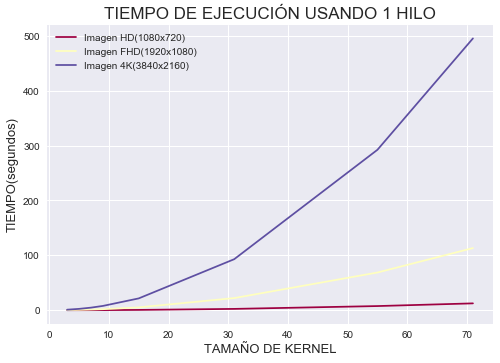

In [148]:
HILO_UNO = [];

fig, ax = plt.subplots()
ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,3)))
times_list = []
plt.xlabel('TAMAÑO DE KERNEL', fontsize=13)
plt.ylabel('TIEMPO(segundos)', fontsize=13)
plt.title('TIEMPO DE EJECUCIÓN USANDO 1 HILO', fontsize=17)

for image in range(0,3):
    time_list = txtToVector("logs_cuda/" + IMAGES_LIST[image] + ".txt")
    HILO_UNO.append(time_list)
    plt.plot(KERNELS_LIST, time_list,label='Imagen ' + IMAGES_LIST_2[image])

plt.legend()
plt.show()

# Gráficas de Tiempo de Ejecución (TESLA P100 PCIE 16GB)

**1 BLOQUE POR GRID**

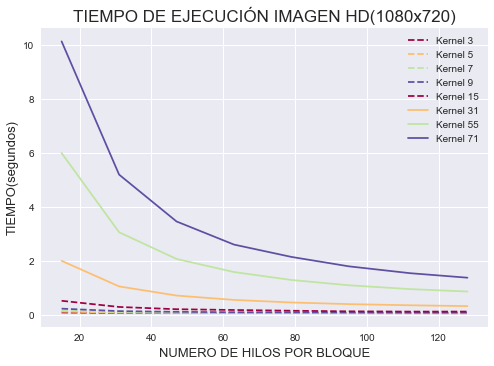

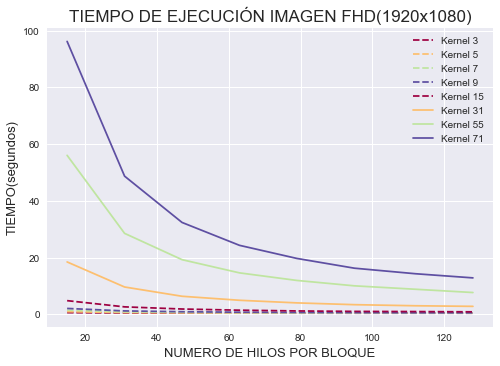

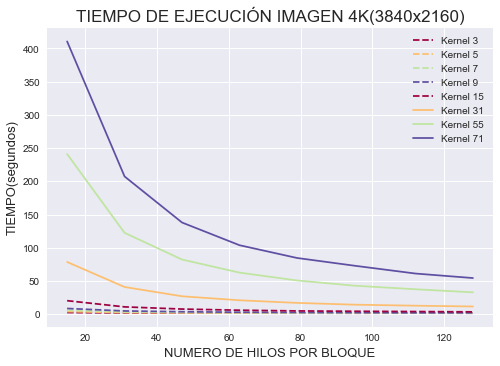

In [144]:
for image in range(0, 3):
    graph(image, 1)

**23 BLOQUES POR GRID**

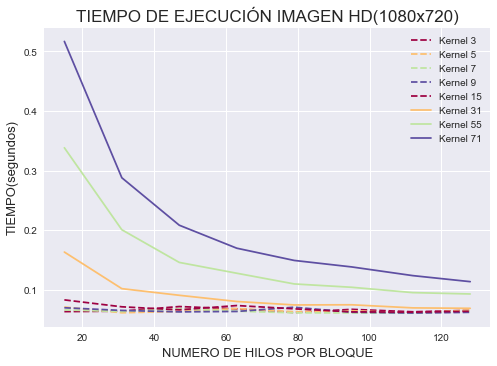

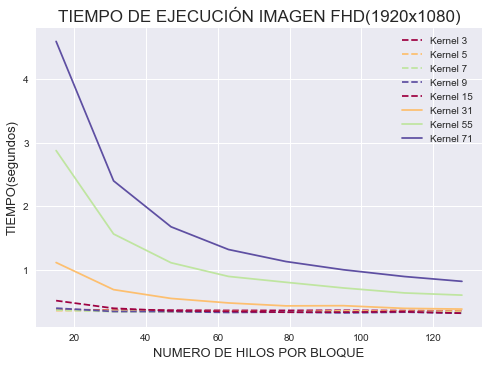

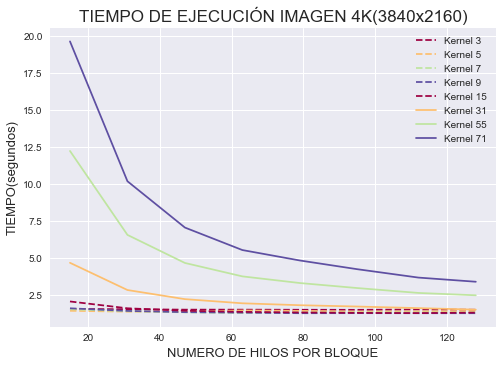

In [135]:
for image in range(0, 3):
    graph(image, 23)

**45 BLOQUES POR GRID**

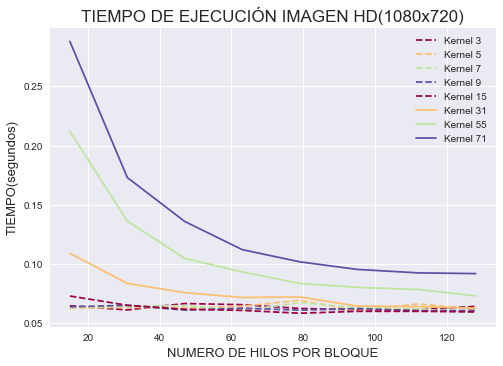

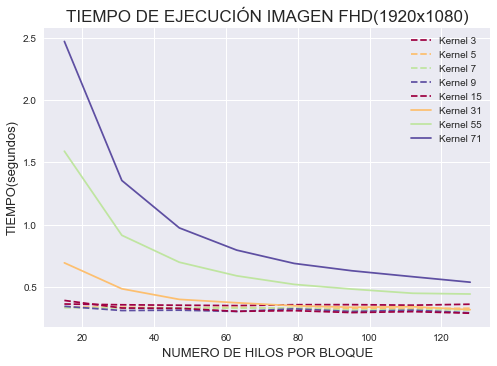

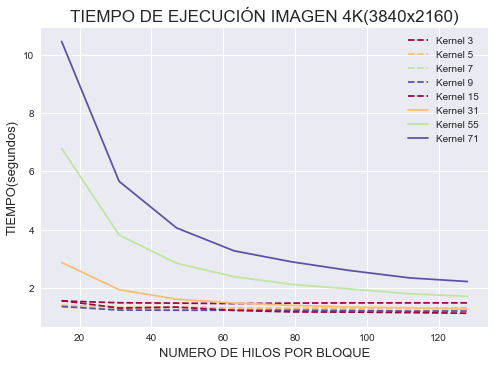

In [136]:
for image in range(0, 3):
    graph(image, 45)

**67 BLOQUES POR GRID**

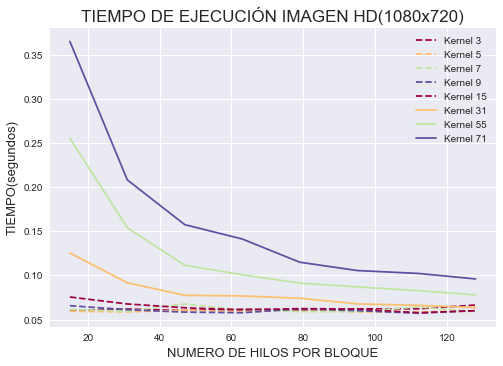

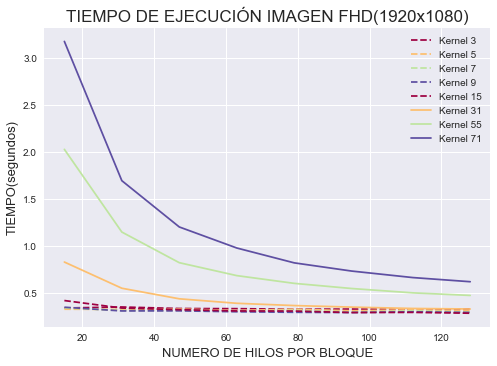

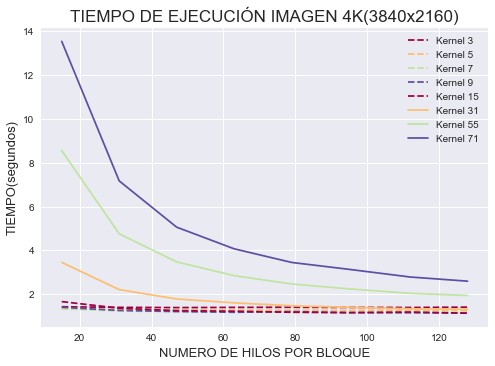

In [137]:
for image in range(0, 3):
    graph(image, 67)

**89 BLOQUES POR GRID**

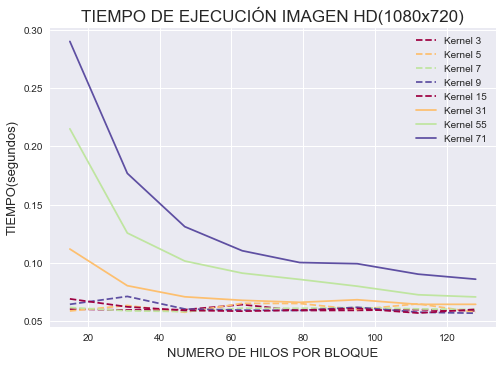

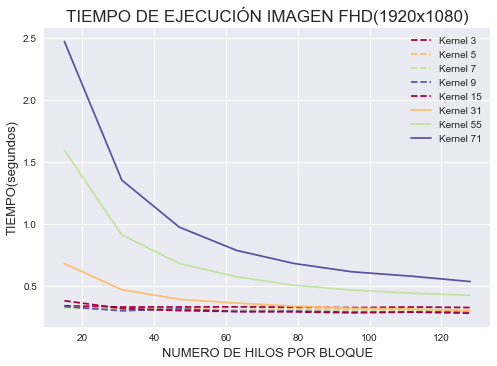

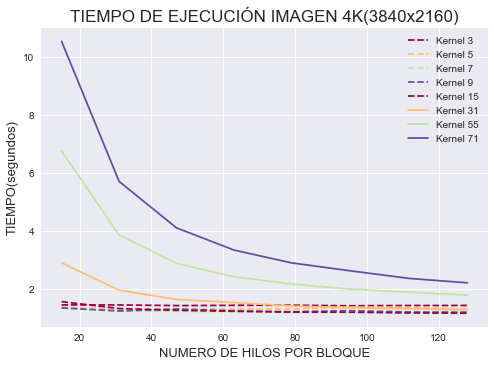

In [138]:
for image in range(0, 3):
    graph(image, 89)

**112 BLOQUES POR GRID**

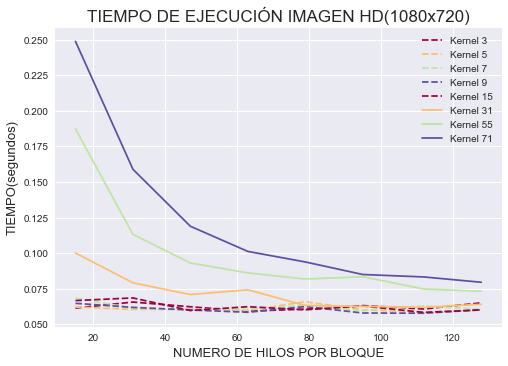

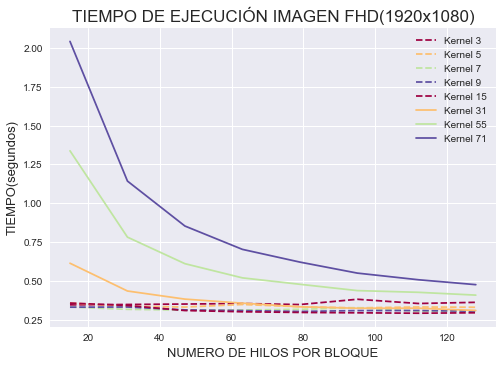

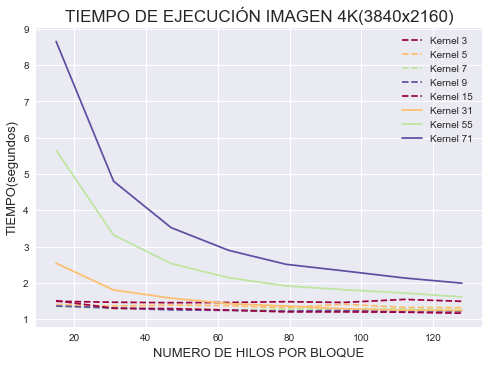

In [139]:
for image in range(0, 3):
    graph(image, 112)

In [149]:
print(HILO_UNO)

[[0.032745, 0.072642, 0.138607, 0.210258, 0.570956, 2.431684, 7.59527, 12.50892], [0.250918, 0.599467, 1.173641, 1.892668, 5.154672, 22.161597, 68.742139, 113.272521], [0.998799, 2.478118, 4.72648, 7.867304, 21.567455, 93.022704, 292.438213, 495.426395]]


In [165]:
 def graphSpeedUp(image_number, n_blocks_per_grid):
    
    fig, ax = plt.subplots()
    ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,NUM_COLORS)))
    times_list = []
    plt.xlabel('NUMERO DE HILOS POR BLOQUE', fontsize=13)
    plt.ylabel('SPEED UP', fontsize=13)
    plt.title('SPEED UP CON IMAGEN ' + IMAGES_LIST_2[image_number], fontsize=17)
    
    counter = 0
    for kernel in KERNELS_LIST:
        time_list = txtToVector("logs/" + IMAGES_LIST[image_number] + "_" + str(n_blocks_per_grid) + "_" + str(kernel) + ".txt")
        
        for i in range(0, 8):
            time_list[i] = HILO_UNO[image_number][counter]/time_list[i]
            
        if kernel < 15:
            plt.plot(THREADS_LIST, time_list, '--',label='Kernel ' + str(kernel))
        else:
            plt.plot(THREADS_LIST, time_list,label='Kernel ' + str(kernel))
            
        counter = counter + 1
        
    plt.legend()
    plt.show()

# Gráficas de SpeedUP

**1 BLOQUE POR GRID**

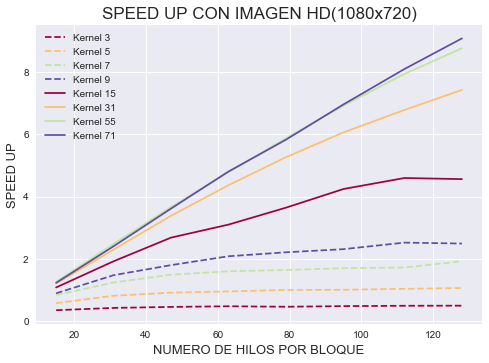

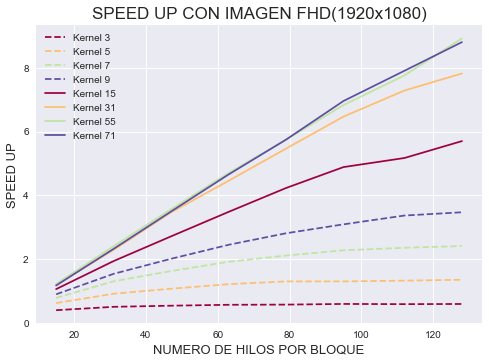

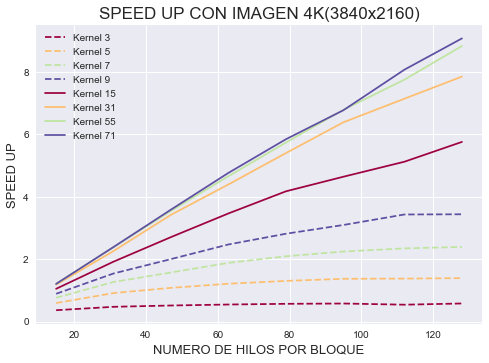

In [166]:
for image in range(0, 3):
    graphSpeedUp(image, 1)

**23 BLOQUES POR GRID**

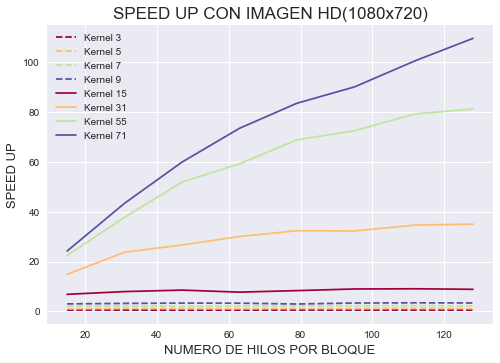

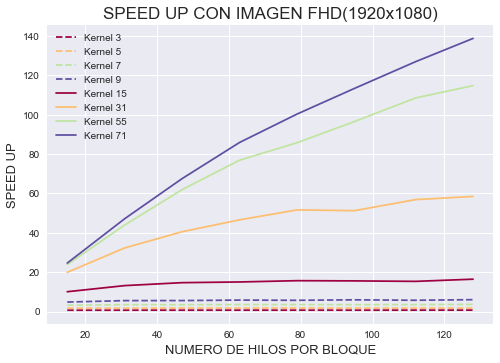

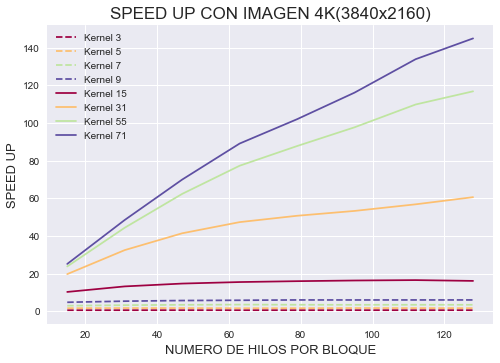

In [167]:
for image in range(0, 3):
    graphSpeedUp(image, 23)

**45 BLOQUES POR GRID**

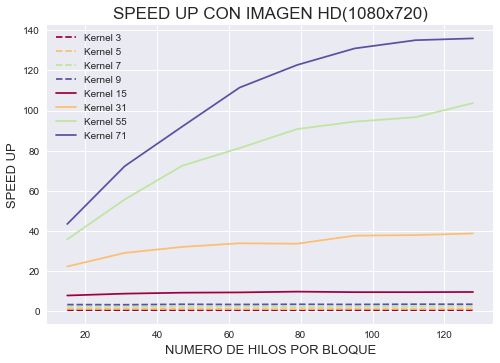

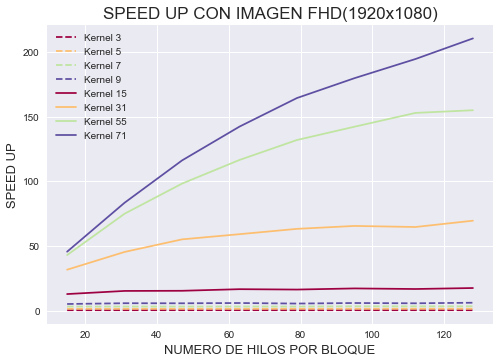

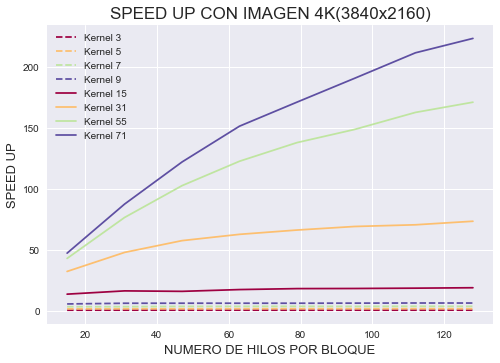

In [168]:
for image in range(0, 3):
    graphSpeedUp(image, 45)

**67 BLOQUES POR GRID**

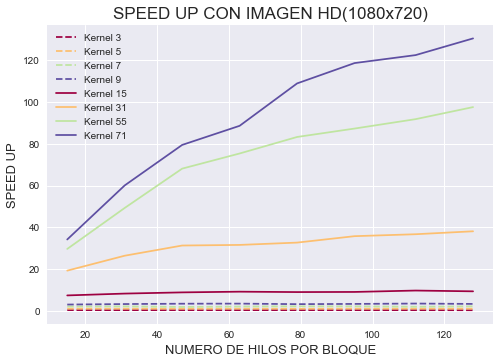

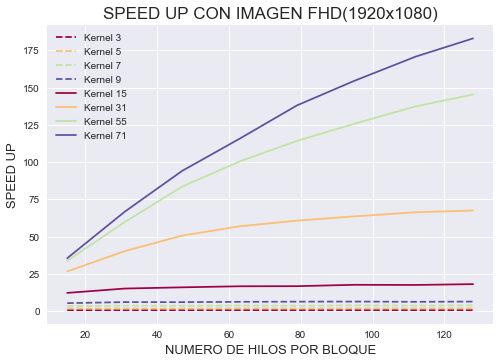

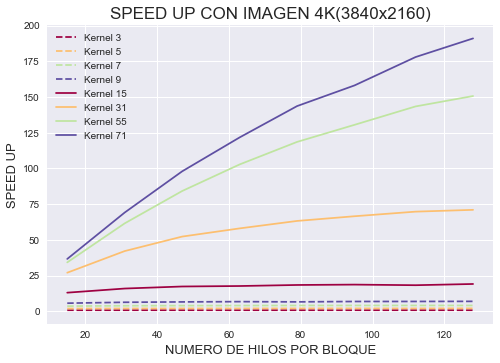

In [169]:
for image in range(0, 3):
    graphSpeedUp(image, 67)

**89 BLOQUES POR GRID**

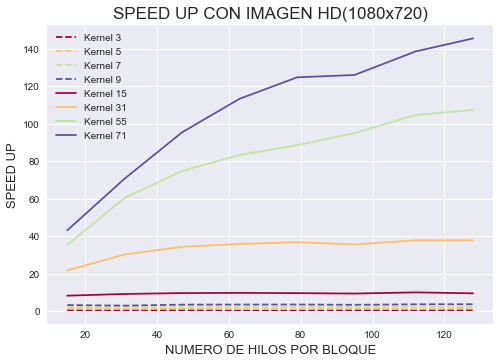

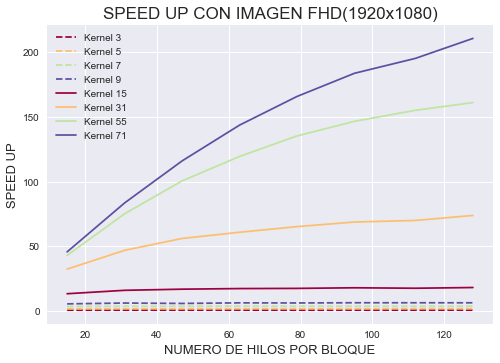

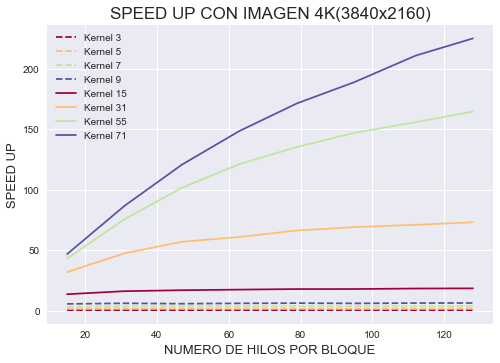

In [171]:
for image in range(0, 3):
    graphSpeedUp(image, 89)

**112 BLOQUES POR GRID**

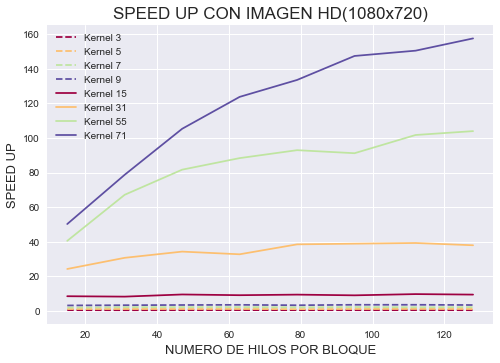

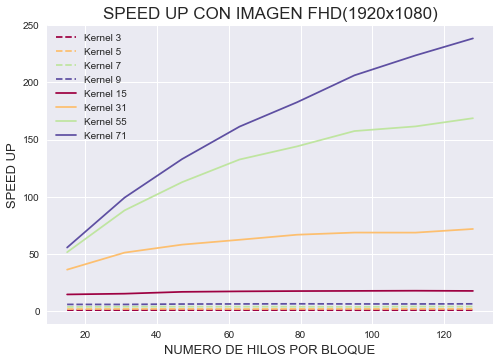

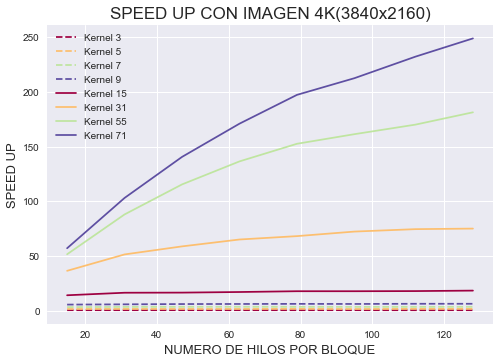

In [173]:
for image in range(0, 3):
    graphSpeedUp(image, 112)